In [94]:
import numpy as np #self-explainatory
import matplotlib.pyplot as plt #helps us visualize stuff
import tensorflow as tf #neural network tool we're using
from tensorflow import keras
from tensorflow.keras import layers, models
import os #tells us stuff abt the directory and whatnot
import random

In [79]:
(train_img, train_lbl), (test_img, test_lbl) = keras.datasets.mnist.load_data()
#splits the data into two sets: testing and training. keras is doing all of this
print(len(test_img))
print(len(test_lbl))

10000
10000


In [74]:
train_img = train_img/255
test_img = test_img/255
#in the mnist dataset, each pixel in each image is a value from 0 to 255. 
#why deal with such big numbers? too complicated. i'll divide by 255 to give me a value between 0 and 1 instead.

In [75]:
model = models.Sequential([ #this is the actual NN!
#this is the actual NN!
    layers.Flatten(input_shape=(28, 28)),
    #2d->3d array
    layers.Dense(128, activation='sigmoid'),
    #64 neurons, decided to go with a sigmoid function bc why not
    layers.Dense(128, activation='sigmoid'),
    #i decided to add two layers bc i can mess with it better later on
    layers.Dense(10, activation='softmax') #this is last layer there are ten numbers 0-9
    #softmax gives the likelihood for any neuron 1-10 actually being the number 1-10. tells us probability basically of which digit it thinks it is
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#adam updates the weight of the models. idk what this means so it's in my comments for future learning
#sparse_categorical_crossentropy calculates how far off the model's predictions are
#metrics tells us how accurate the nn is

In [76]:
model.fit(train_img, train_lbl, epochs=5)
#puts the training stuff into our model. also it trains 3 times bc why not

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.7908 - loss: 0.7812
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9457 - loss: 0.1845 
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9623 - loss: 0.1258
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9729 - loss: 0.0885
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9803 - loss: 0.0667 


In [80]:
print(len(test_img))
print(len(test_lbl))
test_loss, test_acc = model.evaluate(test_img, test_lbl)

10000
10000
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9566 - loss: 0.1470    


In [81]:
print(f"Test accuracy: {test_acc}")
predictions = model.predict(test_img)

Test accuracy: 0.9624000191688538
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


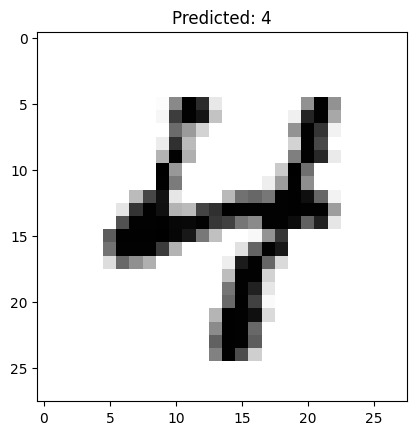

In [105]:
rnum=random.randint(0,9999)
plt.imshow(test_img[rnum], cmap=plt.cm.binary)
plt.title(f"Predicted: {np.argmax(predictions[rnum])}")
plt.show()